### A comparison between 2 XRD profiles and experimental data of NaCl w/ photon wavelength = 1.54056 
1. Our gaussian profile, FWHM = 0.2
2. Experimental data from http://rruff.info/salt/display=default/R070292
3. Mercury gaussian profile, FWHM = 0.2

# TODO: CODE SIMILARITY FUNCTIONS

# 1. our profile

In [1]:
from XRD import Element, crystal, XRD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_struct = crystal('cif',filename='NaCl.cif')
_wavelength = 1.54056
_max_diff_angle = 90
_profile = 'gaussian'
_fwhm = 0.2
_po = False
_G = None
xrd = XRD(_struct,_wavelength,_max_diff_angle,_profile,_fwhm,_po,_G)

In [3]:
profile = xrd.gpeaks
all_info = xrd.pxrd
two_thetas = np.array((all_info[:,0]))
two_thetas = np.linspace(np.min(two_thetas)-10,np.max(two_thetas)+10,profile.shape[0])

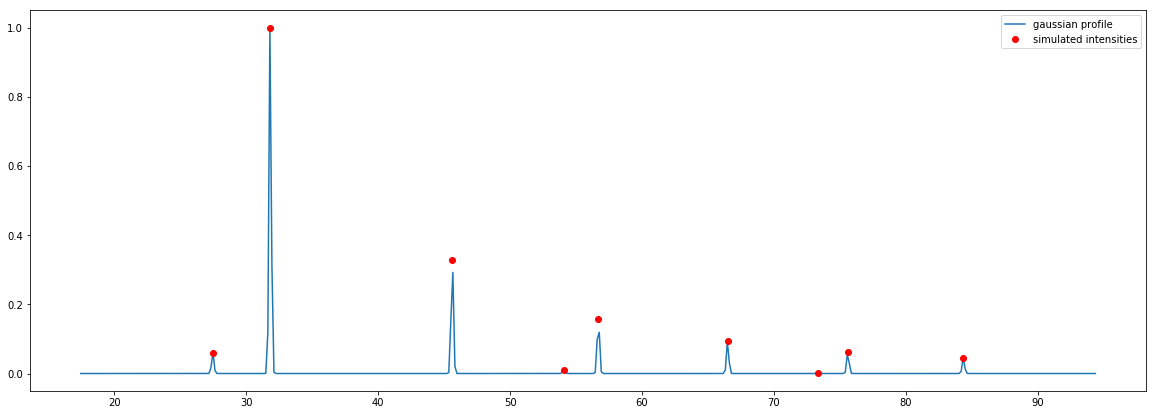

In [4]:
plt.figure(figsize=(20,7))
plt.plot(two_thetas,profile,label = 'gaussian profile')
plt.plot(all_info[:,0],all_info[:,-1],'ro',label = 'simulated intensities')
plt.legend()
plt.show()

# 2. experimental data

In [5]:
exp_data = np.loadtxt(fname="NaCl-experiment.txt",delimiter=",")
exp_data[:][:,1] = exp_data[:][:,1]/np.max(exp_data[:][:,1])

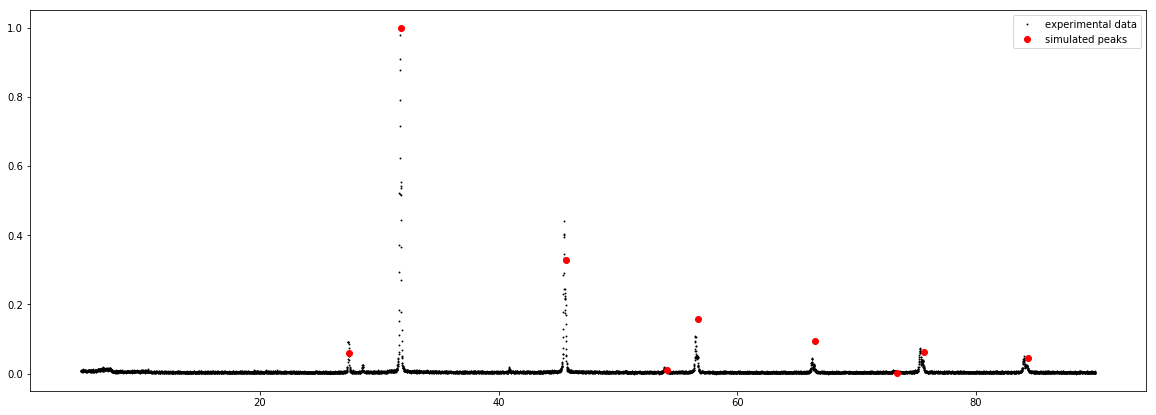

In [6]:
plt.figure(figsize=(20,7))
plt.plot(exp_data[:][:,0],exp_data[:][:,1],'ko',ms = 0.9,label='experimental data')
plt.plot(all_info[:,0],all_info[:,-1],'ro',label='simulated peaks')
#plt.plot(two_thetas,profile,label = 'gaussian profile')


plt.legend()
plt.show()

# 3. mercury profile

In [7]:
merc_data = np.loadtxt(fname="NaCl-mercury.tsv")
merc_data[:][:,1] = merc_data[:][:,1]/np.max(merc_data[:][:,1])

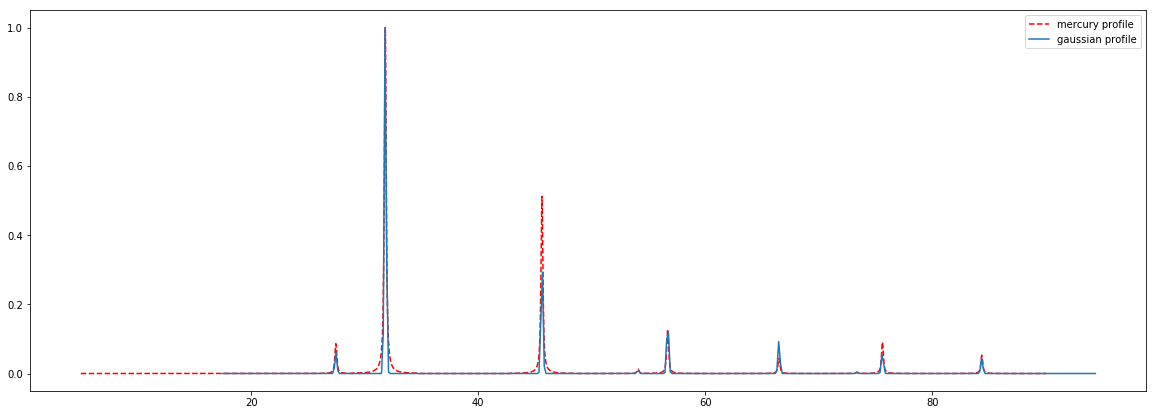

In [8]:
plt.figure(figsize=(20,7))
plt.plot(merc_data[:][:,0],merc_data[:][:,1],'--r',ms = 0.9,label = 'mercury profile')
#plt.plot(all_info[:,0],all_info[:,-1],'ro',label = 'simulated peaks')
plt.plot(two_thetas,profile,label = 'gaussian profile')

plt.legend()
plt.show()

# all together

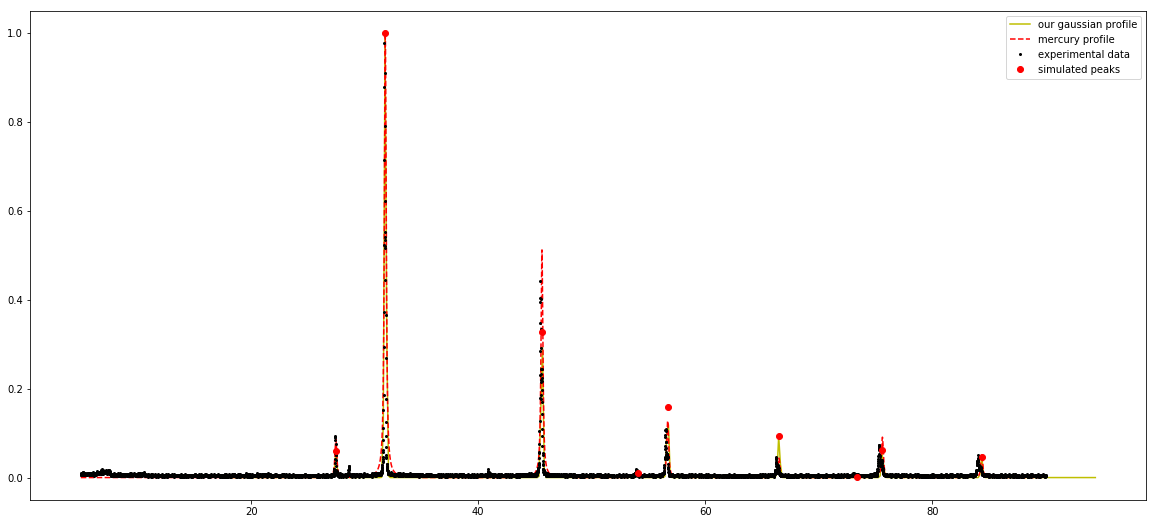

In [9]:
# all together now
plt.figure(figsize=(20,9))
plt.plot(two_thetas,profile,'y-',label = 'our gaussian profile')
plt.plot(merc_data[:][:,0],merc_data[:][:,1],'--r',ms = 0.9, label = 'mercury profile')
plt.plot(exp_data[:][:,0],exp_data[:][:,1],'ko',ms = 2, label = 'experimental data')
plt.plot(all_info[:,0],all_info[:,-1],'ro',label='simulated peaks')
plt.legend()
plt.show()